# Visualization Tools

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Basic Visualization Tools](#0)<br>
    1.  [Area Plots](#1)<br>
    2.  [Histograms](#2)<br>
    3.  [Bar Charts](#3)<br>
2.  [Specialized Visualization Tools](#4) <br>
    1.  [Pie Charts](#6) <br>
    2.  [Box Plots](#8) <br>
    3.  [Scatter Plots](#10) <br>
3.  [Advanced Visualization Tools](#12) <br>
    1.  [Waffle Charts](#14) <br>
    2.  [Word Clouds](#16) <br>
    3.  [Seaborn and Regression Plots](#18) <br>
    

</div>



# Basic Visualization Tools <a id="0"></a>

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) **

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "_set__" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later). 

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.





## Area Plots <a id="1"></a>

+ aka area chart or area graph
+ commonly used to represent cumulated totals using numbers or percentages over time.
+ based on line plot

In [1]:
import pandas as pd
import numpy as np
import mgt2001

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
# df_can.columns = list(map(str, df_can.columns)) --> to string
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [2]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [3]:
years = list(map(int, range(1980, 2014)))

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()
# df_top5.columns.name -> Country

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [4]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches # needed for waffle Charts
%matplotlib inline

plt.style.use('ggplot') # refined style

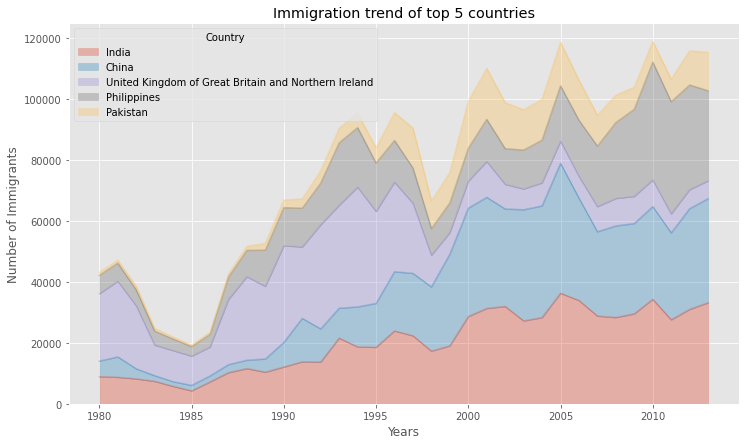

In [5]:
df_top5.plot(kind='area', alpha=.35, figsize=(12, 7))

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 


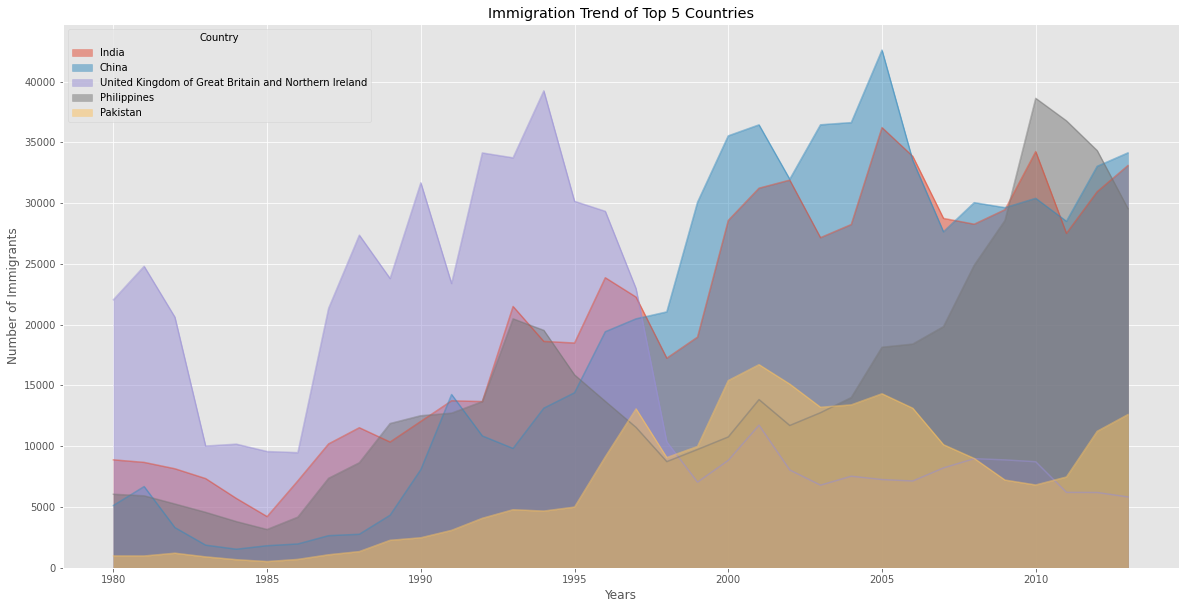

In [6]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histograms <a id="2"></a>
A way of representing the frequency distribution of a variable.


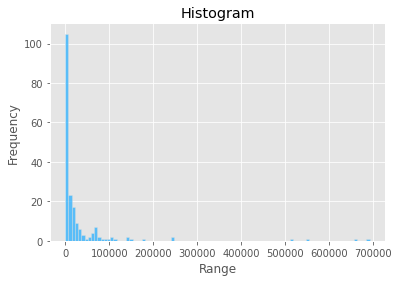

In [7]:
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(df_can['Total'], bins='auto', density=False, facecolor='#2ab0ff', edgecolor='#e0e0e0', alpha=0.75)

plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

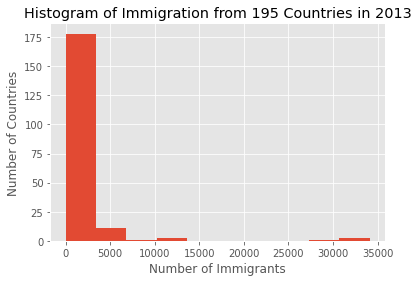

In [8]:
df_can[2013].plot(kind='hist')
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

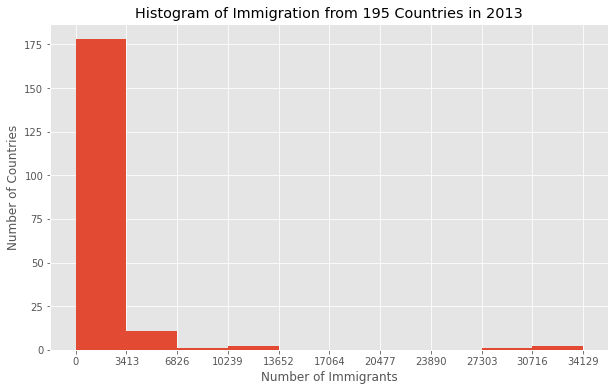

In [9]:
count, bin_edges = np.histogram(df_can[2013])
df_can[2013].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [10]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


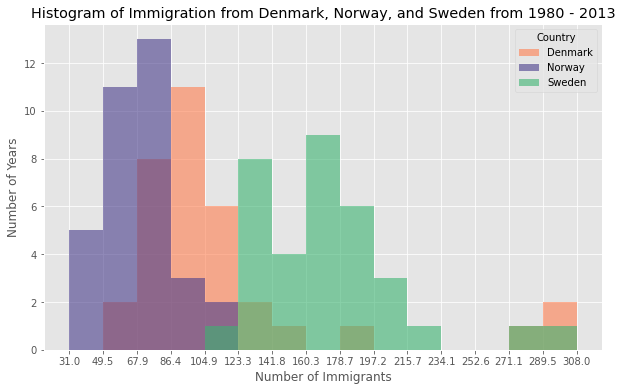

In [11]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do no want the plots to overlap each other, we can stack them using the `stacked` paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


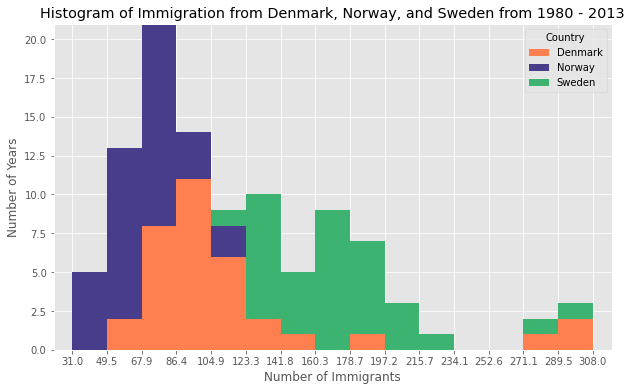

In [12]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## Bar Charts <a id="3"></a>
+ Used to compare the values of a variable at a given point in time

A bar plot is a way of representing data where the _length_ of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

-   `kind=bar` creates a _vertical_ bar plot
-   `kind=barh` creates a _horizontal_ bar plot



In [13]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

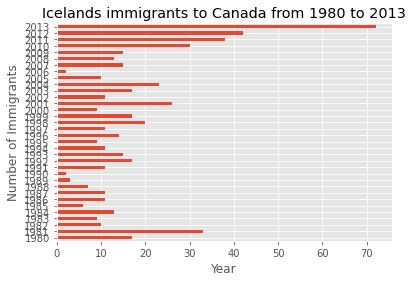

In [14]:
df_iceland.plot(kind='barh')

plt.title('Icelands immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

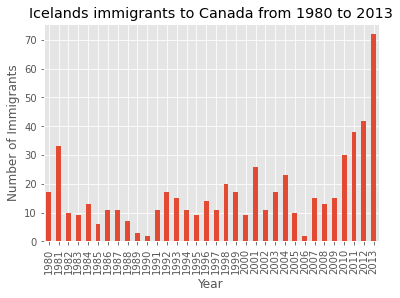

In [15]:
df_iceland.plot(kind='bar')

plt.title('Icelands immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

-   `s`: str, the text of annotation.
-   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
-   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
-   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
-   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    -   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    -   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    -   `color`: Specifes color of arror.
    -   `lw`: Specifies the line width.
-   `rotation`: rotation angle of text in degrees (counter clockwise)
-   `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
-   `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]



I encourage you to read the Matplotlib documentation for more details on annotations: 
[http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


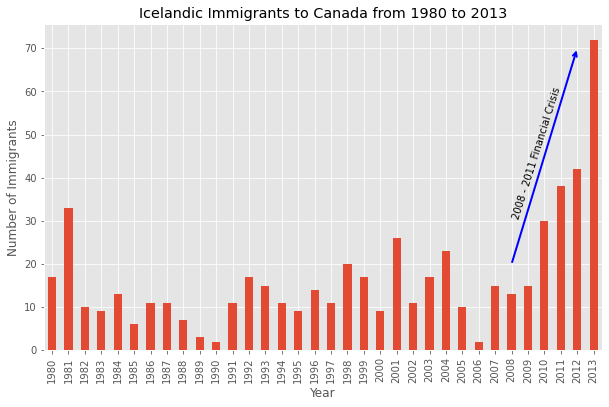

In [16]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )



plt.show()

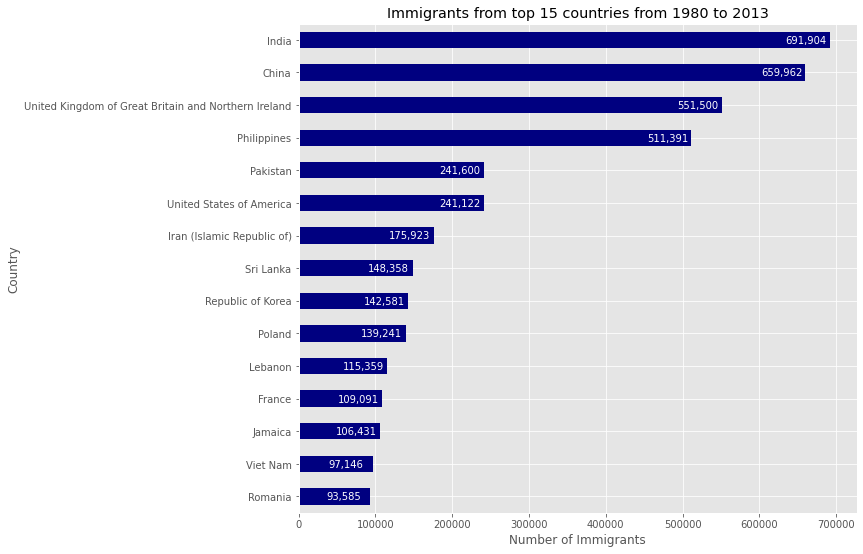

In [17]:
top15 = df_can.sort_values(by="Total", ascending=False).head(15)
top15 = top15['Total']

top15 = top15.sort_values()

ax = top15.plot(kind='barh', figsize=(10, 9), color='navy')

plt.xlabel('Number of Immigrants')
plt.title('Immigrants from top 15 countries from 1980 to 2013')

# annotate value labels to each country
for index, value in enumerate(top15): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 58000, index - 0.10), color='white')



plt.show()

# Specialized Visualization Tools <a id="4"></a>

## Pie Charts <a id="6"></a>


Ploting the data: We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

-   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
-   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
-   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


In [18]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


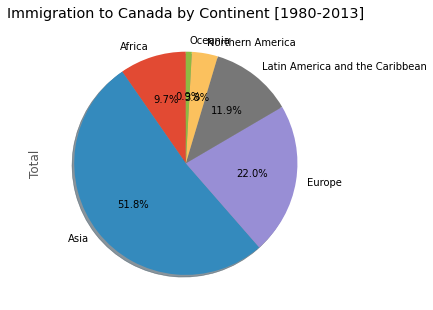

In [19]:
df_continents.Total.plot(kind='pie',figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

-   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
-   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
-   Pass in a custom set of colors for continents by passing in `colors` parameter.
-   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


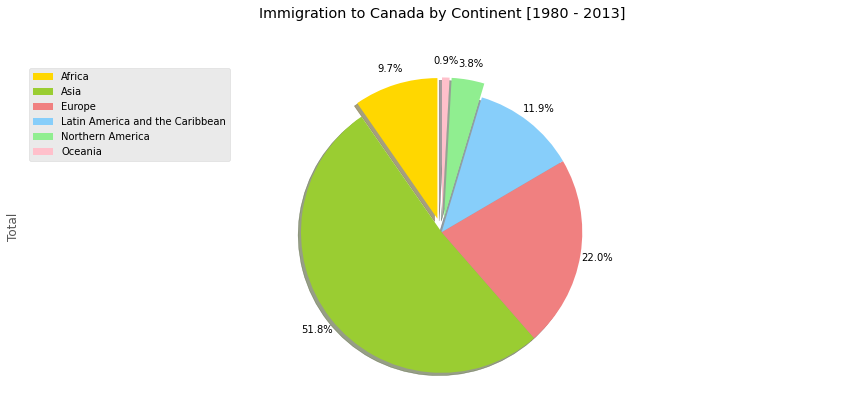

In [20]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Box Plots <a id="8"></a>

+ <https://icheft.github.io/MGT-2001-Notes/Chap-04-Numerical-Descriptive-Techniques/#box-whisker-plot>

![](https://icheft.github.io/MGT-2001-Notes/img/0417.png)

Each quartiile can be attained by the following method:

```python
import mgt2001

data = np.array([ 0,  0,  5,  7,  8,  9, 12, 14, 22, 33])
print(mgt2001.per.percentile(data, 25)) # >>> 3.75
print(mgt2001.per.percentrank(data, 12)) # pass in value as 12 >>> 63.63636363636363th 
```

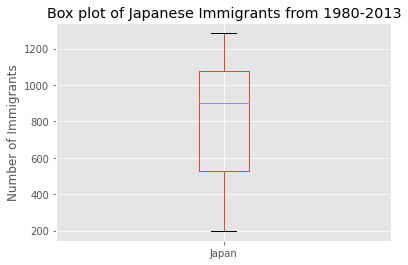

In [21]:
df_jap = df_can.loc['Japan', years].transpose()
df_jap.plot(kind='box')
plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

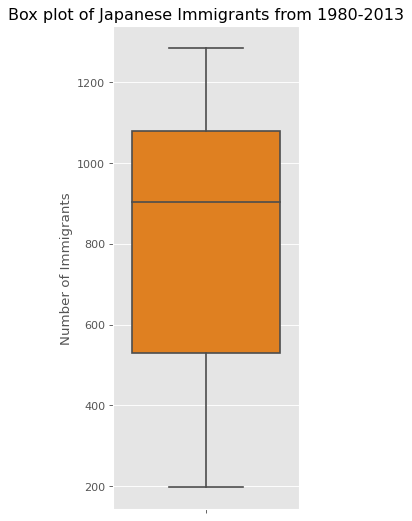

In [22]:
import seaborn as sns
# Plot
plt.figure(figsize=(3,8), dpi= 80)
ax = sns.boxplot(y=df_jap, palette="afmhot", orient='v') # orient='h' results in horizontal boxplot
plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')
plt.show()

## Scatter Plots <a id="10"></a>
+ To see if a relationship exists between two variables

In [23]:
df_total = df_can[years].copy()

df_total.loc['Total'] = df_total.sum(axis=0)
df_total = df_total.loc['Total'].to_frame().reset_index().rename(columns={'index': 'year', 'Total': 'total'})
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


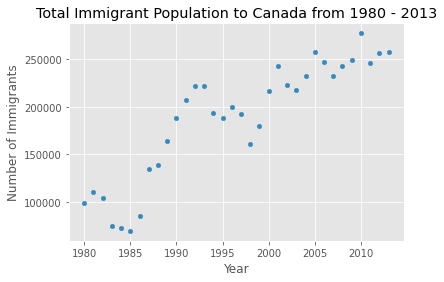

In [24]:
df_total.plot(
    kind='scatter',
    x='year',
    y='total',
)

plt.title('Total Immigrant Population to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

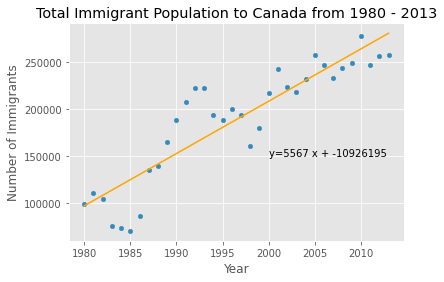

In [25]:
x = df_total.year
y = df_total.total
fit = np.polyfit(x, y, deg = 1)

df_total.plot(
    kind='scatter',
    x='year',
    y='total',
)

plt.title('Total Immigrant Population to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='orange')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

### Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the _normalized_ value of the population for each year.


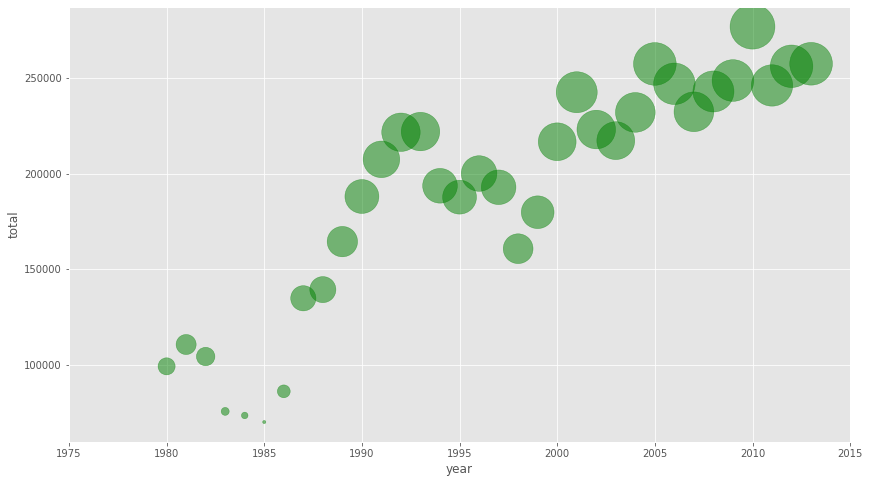

In [26]:
norm_total = (df_total['total'] - df_total['total'].min()) / (df_total['total'].max() - df_total['total'].min())
ax0 = df_total.plot(    
    kind='scatter',
    x='year',
    y='total',
    figsize=(14, 8),
    alpha=0.5,                  # transparency
    color='green',
    s=norm_total * 2000 + 10,  # pass in weights 
    xlim=(1975, 2015)
)



# Advanced Visualization Tools <a id="12"></a>
## Waffle Charts <a id="14"></a>

+ A waffle chart is an interesting visualization that is normally created to display progress toward goals.

In [27]:
from PIL import Image # converting images into arrays

Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [28]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [29]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [30]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


**Step 5.** Map the `waffle` chart matrix into a visual.


Waffle chart populated!


<Figure size 432x288 with 0 Axes>

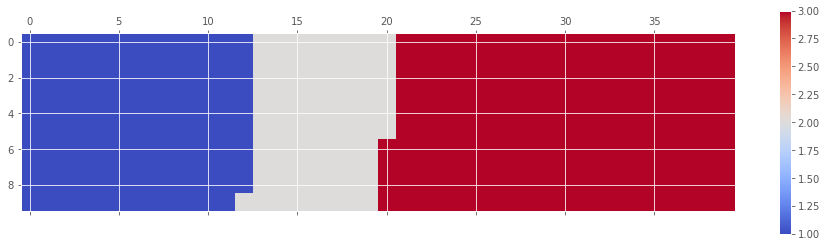

In [31]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


<Figure size 432x288 with 0 Axes>

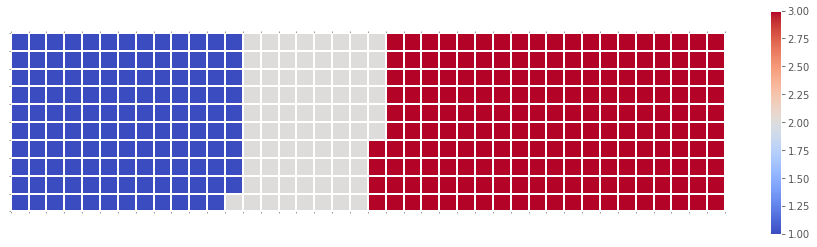

In [32]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Step 7.** Create a legend and add it to chart.


<Figure size 432x288 with 0 Axes>

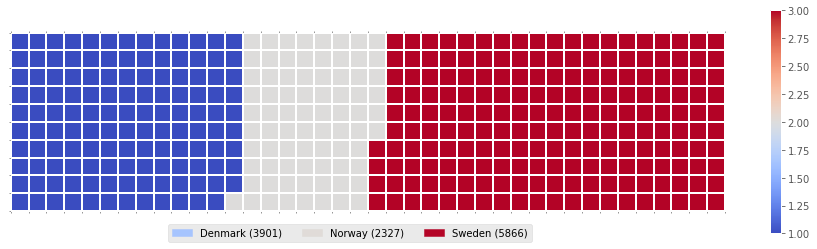

In [33]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

### Using PyWaffle

In [34]:
data = dict()
for i, tiles in enumerate(tiles_per_category):
    data[df_dsn.index.values[i]] = tiles

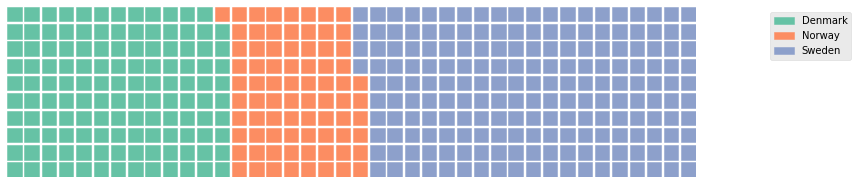

In [43]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    # columns=40,
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    figsize=(12, 8)
)
plt.show()

With Title, Legend, Colors, Background Color, Block Color, Direction and Style.

PyWaffle supports [Font Awesome icons](https://fontawesome.com) in the chart.

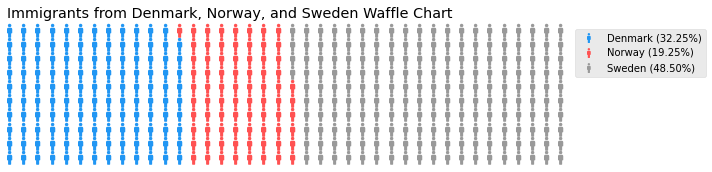

In [72]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=["#2196f3", "#ff5252", "#999999"],
    title={'label': 'Immigrants from Denmark, Norway, and Sweden Waffle Chart', 'loc': 'left'},
    labels=[f"{k} ({((v / sum(data.values())) * 100):.2f}%)" for k, v in data.items()],
    # legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    # starting_location='NW',
    # block_arranging_style='snake',
    figsize=(10, 8),
    icons='male', 
    font_size=14, 
    icon_legend=True
)
# fig.set_facecolor('#EEEEEE')
plt.show()

## Word Clouds <a id="16"></a>
+ A Word cloud is a depiction of the frequency of different words in some textual data

In [77]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [78]:
alice_novel = open('alice_novel.txt', 'r').read()

Next, let's use the stopwords that we imported from `word_cloud`. We use the function _set_ to remove any redundant stopwords.



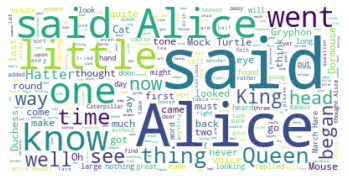

In [79]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

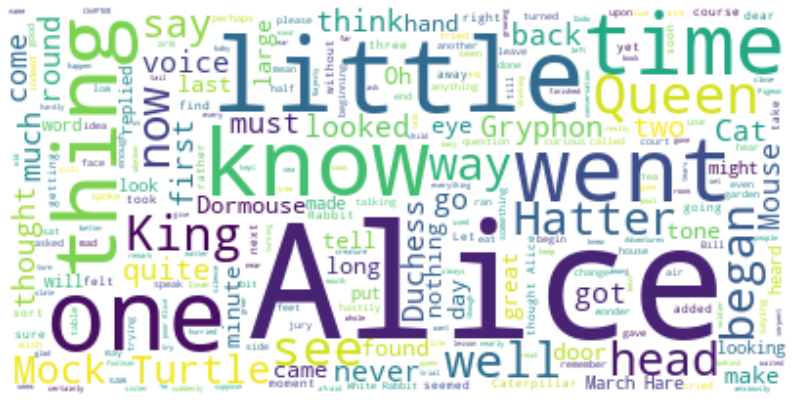

In [81]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Masking

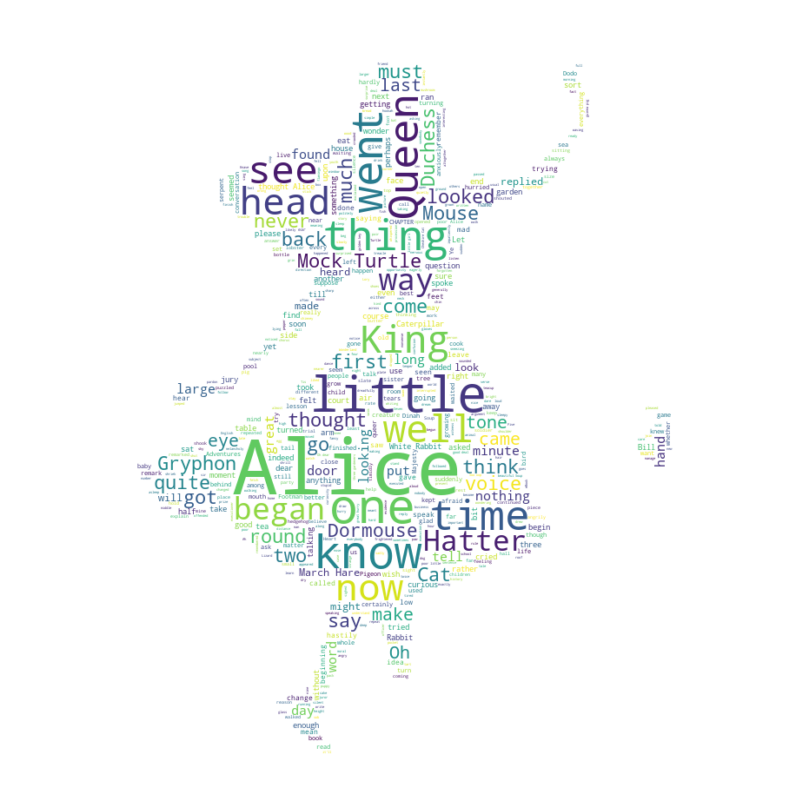

In [83]:
alice_mask = np.array(Image.open('alice_mask.png'))

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Using `df_can`

In [85]:
total_immigration = df_can['Total'].sum()
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

Word cloud created!


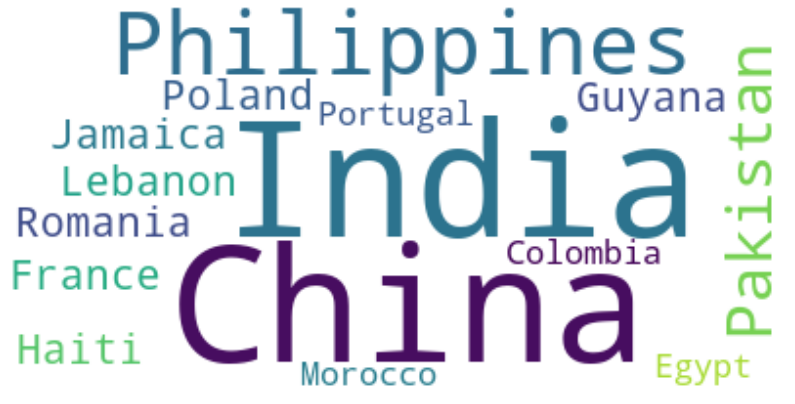

In [86]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Seaborn and Regression Plots <a id="18"></a>

+ Seaborn is a Python visualization library based on Matplotlib
+ Visuals that need ~20 lines of code using Matplotlib to be created, with Seaborn, the number of lines of code is reduced by 5-fold



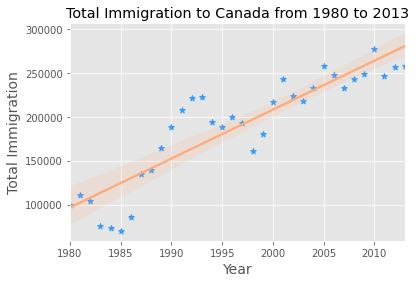

In [93]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_total, scatter_kws={'color':'dodgerblue'}, line_kws={'color':'#ffaa77'}, marker='*') # 95% interval
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Total Immigration', fontsize = 14)
ax.set_title('Total Immigration to Canada from 1980 to 2013')
plt.show()